In [35]:
import os, sys
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 경로 재설정을 위한 코드 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    path = os.path.join(module_path, 'src')
    sys.path.append(path)

### 1. KFold dataloader를 불러옵니다. 

In [36]:
from utils.dataloader import KFoldDataloader
train_data_path = '../data/train/train.csv'
num_folds = 5
kfold_dataloader = KFoldDataloader(
                                    'klue/roberta-large',
                                    train_data_path,
                                    '../data/dict_label_to_num.pkl', 
                                    seed = 777,
                                    max_length = 256,
                                    batch_size = 32,
                                    is_test = False,
                                    k = random.randint(0, num_folds-1),
                                    num_folds = num_folds
                                            )

kfold_dataloader.setup()

[INFO] Loading Dataset...


### 2. validation dataset과 train dataset으로 분리할 데이터를 불러옵니다. 

In [37]:
import pandas as pd
train_data = pd.read_csv(train_data_path)
train_data.head(2)

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree


### 3. stratified kfold에 의해 나누어진 train dataset의 레이블별 데이터 분포와 validation dataset의 분포를 확인합니다.

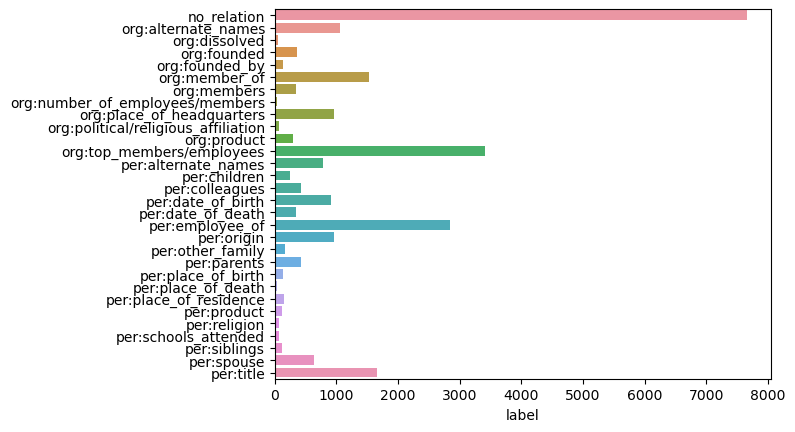

In [38]:
# train dataset 분포 확인 
train_dataset = train_data['label'][kfold_dataloader.dataset.kfold_index]
train_label_distribution = train_dataset.value_counts().sort_index()
label = train_label_distribution.index
index = np.arange(len(label))

plot = sns.barplot(x=train_label_distribution, y=index, orient='h')
plot.set_yticks(range(len(index)))
plot.set_yticklabels(label)
plt.show()


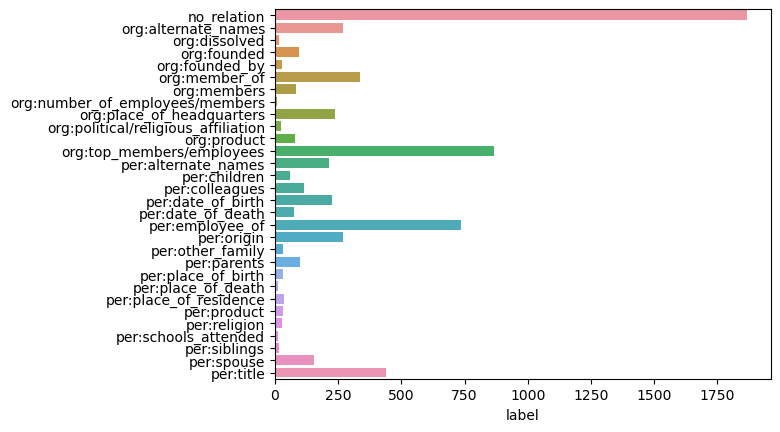

In [39]:

val_dataset = train_data['label'][kfold_dataloader.val_dataset.kfold_index]
val_label_distribution = val_dataset.value_counts().sort_index()
label = val_label_distribution.index
index = np.arange(len(label))

plot = sns.barplot(x=val_label_distribution, y=index, orient='h')
plot.set_yticks(range(len(index)))
plot.set_yticklabels(label)
plt.show()


[결론] stratified_onefold validation 구현이 제대로 되었음을 확인할 수 있습니다. 